In this notebook, we are trying to classify the images for traffic signs into one of the classes

In [1]:
# Import Libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,Conv2D, MaxPool2D

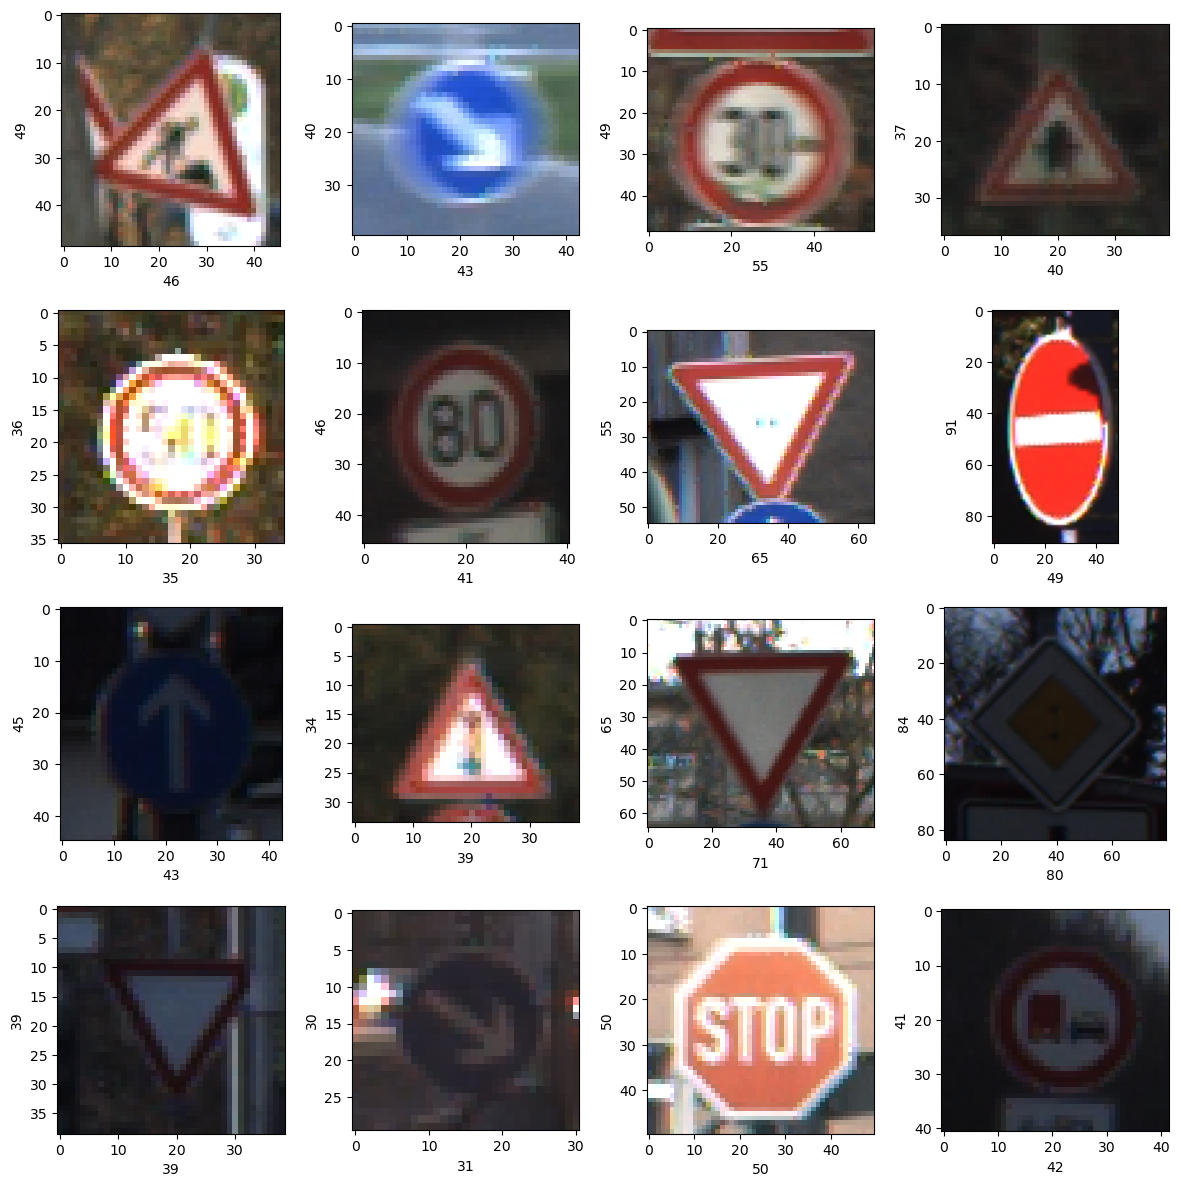

In [2]:
# Plotting 12 random image to check the dataset
plt.figure(figsize=(12,12))
path = '/kaggle/input/gtsrb-german-traffic-sign/Test'
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/' +random.choice(os.listdir(path)))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1])
    plt.ylabel(rand_img.shape[0])
    

In [3]:
dim1=[]
dim2=[]

for i in range(0,43):
    lables='/kaggle/input/gtsrb-german-traffic-sign/Train'+'/{0}'.format(i)
    image_path = os.listdir(lables)
    for x in image_path:
        img = imread(lables + '/' +x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [4]:
# printing the dimenstions of the images
print('Dimension 1 Mean:', np.mean(dim1), "Dimension 2 mean:", np.mean(dim2))

Dimension 1 Mean: 50.328929582493814 Dimension 2 mean: 50.83587951745773


We see that the mean of the Images are 50 X 50 so resizing all the images to 50*50

In [5]:
# Resize
images = []
label_id = []

for i in range(43): 
    labels = '/kaggle/input/gtsrb-german-traffic-sign/Train' +'/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)
                         

In [6]:
# Converting the images into numpy arrays
images = np.array(images)

# Nomalizing stuff
images = images/255

In [7]:
# COnverting label ids into numpy array
label_id = np.array(label_id)
label_id.shape

(39209,)

In [8]:
# Checking the shape of the images
images.shape

(39209, 50, 50, 3)

In [9]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [10]:
# Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, 
                                                 label_id,
                                                 test_size=0.2,
                                                 random_state=42)

In [11]:
# One hot encoding
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [12]:
# Building the model

model = Sequential()

model.add(Conv2D(filters= 64, kernel_size=(3,3), input_shape = x_train.shape[1:],activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))


# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [13]:
# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val,y_val), verbose=2)

Epoch 1/10


2023-04-22 19:15:39.950236: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


246/246 - 12s - loss: 2.5842 - accuracy: 0.2959 - val_loss: 1.3437 - val_accuracy: 0.6413 - 12s/epoch - 49ms/step
Epoch 2/10
246/246 - 3s - loss: 1.2375 - accuracy: 0.6112 - val_loss: 0.5609 - val_accuracy: 0.8762 - 3s/epoch - 13ms/step
Epoch 3/10
246/246 - 3s - loss: 0.7939 - accuracy: 0.7439 - val_loss: 0.3099 - val_accuracy: 0.9454 - 3s/epoch - 13ms/step
Epoch 4/10
246/246 - 3s - loss: 0.6197 - accuracy: 0.7973 - val_loss: 0.1933 - val_accuracy: 0.9584 - 3s/epoch - 13ms/step
Epoch 5/10
246/246 - 3s - loss: 0.5156 - accuracy: 0.8308 - val_loss: 0.1621 - val_accuracy: 0.9718 - 3s/epoch - 13ms/step
Epoch 6/10
246/246 - 3s - loss: 0.4555 - accuracy: 0.8503 - val_loss: 0.1408 - val_accuracy: 0.9748 - 3s/epoch - 13ms/step
Epoch 7/10
246/246 - 3s - loss: 0.4053 - accuracy: 0.8650 - val_loss: 0.1103 - val_accuracy: 0.9773 - 3s/epoch - 13ms/step
Epoch 8/10
246/246 - 3s - loss: 0.3646 - accuracy: 0.8792 - val_loss: 0.0961 - val_accuracy: 0.9816 - 3s/epoch - 13ms/step
Epoch 9/10
246/246 - 3s -

<AxesSubplot:>

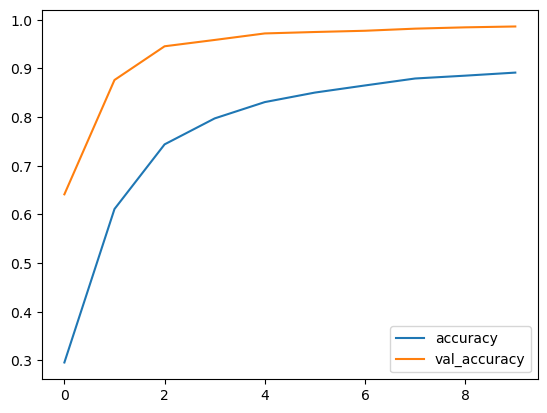

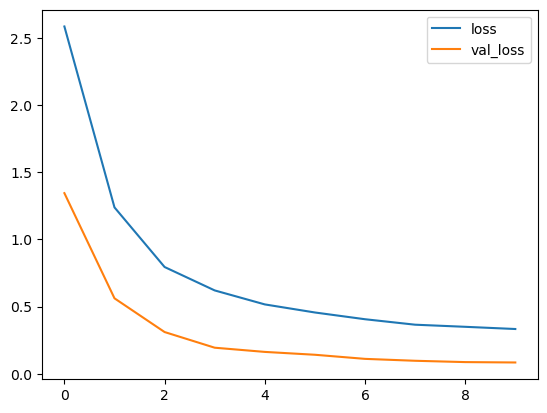

In [14]:
evaluation = pd.DataFrame(model.history.history )
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [15]:
test_path = '/kaggle/input/gtsrb-german-traffic-sign/Test'

In [16]:
# Function defintion for feature scaleing
def scaling(test_images, test_path):
    images=[]
    image_path = test_images
    for x in image_path:
        if x.endswith('png'):
            img = Image.open(test_path + '/' + x)
            img = img.resize((50,50))
            img = np.array(img)
            images.append(img)
        else:
            pass
    # Converting the images into a numpy array
    images = np.array(images)
    images = images/255
    return images

In [17]:
# for file in os.listdir(test_path):
#     if file.endswith('png'):
#         pass
#     else:
#         print(file)


In [18]:
# Function calling
test_images = scaling(sorted(os.listdir(test_path)), test_path)

In [19]:
test = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [20]:
# Predictions
y_pred = np.argmax(model.predict(test_images), axis=-1)
y_pred

395/395 [==============================] - 1s 2ms/step


array([16,  1, 38, ..., 38,  7, 10])

In [21]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

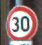

In [22]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img

In [23]:
# Original Image
print('Original Image:' ,all_lables[y_test[1]])

Original Image: Speed limit (30km/h)


In [24]:
# Predicted Image
print('Predicted Image:' ,all_lables[y_pred[1]])

Predicted Image: Speed limit (30km/h)
